<h1>THE EMPLOYMENT LANDSCAPE IN SINGAPORE</h1>


## TABLE OF CONTENTS

* [RESEARCH OBJECTIVES](#RESEARCH_OBJECTIVES)
* [ENVIRONMENT SETUP](#ENV_SETUP)
* [ABOUT THE DATA](#ABTTHEDATA)
    * [Data Source](#DATASOURCE)
    * [Data Access](#DATAACCESS)
    * [Data Selection](#DATASELECTION)
    * [Potential Biases](#POTENTIALBIASES)
    * [Licensing](#LICENSING)
* [DATA PROCESSING](#DATAPROCESSING)
    * [Data Processing Pipeline](#DATAPROCESSINGPIPE)
    * [Reusable functions](#CLEANFUNCTIONS)
    * [Data Extraction and Transformation](#EXTRACTTRANSFORM)
    * [Data Quality Checks and Data Cleaning](#QUALITYCLEANING)
* [DATA ANALYSIS](#DATAANALYSIS)
    * [Reusable functions](#ANLFUNCTIONS)
    * [General Stats](#GENERALSTATS)
    * [Analysis of Job Vacancies and Shifting Demand](#VACANCIES)
    * [Analysis of Recruitment, Resignations, and Retrenchments and its relation to the global economic climate](#ECONOMIC)
* [CONCLUSION](#CONCLUSION)
* [REFERENCES](#REFERENCES)



<a class="anchor" id="RESEARCH_OBJECTIVES"> <h2>RESEARCH OBJECTIVES</h2>  </a>


Over the past 30 years, Singapore has experienced significant economic growth. In fact, its GDP per capita has grown from **~USD 12K** in 1990 to **~USD 65K** in 2019 (Macrotrends, 2021). This is an average annualized growth rate of 5.14%, far higher than the annualized GDP growth rate of 1.88% in America. 

Annualised GDP per Capita Growth Rate = $ (\frac{(2019 GDP - 1990 GDP)}{1990 GDP}) ^ \frac{1}{30}$

In [1]:
#Calculate annualized GDP Growth
gdppercap_growth_sg=((((65233-11862)/11862)**(1/30))-1)*100
print("Annualized GDP growth over past 30 years in Singapore: "+str(round(gdppercap_growth_sg,2))+'%')

Annualized GDP growth over past 30 years in Singapore: 5.14%


In [2]:
#Calculate annualized GDP Growth
gdppercap_growth_us=((((63647-23139)/23139)**(1/30))-1)*100
print("Annualized GDP growth over past 30 years in America: "+str(round(gdppercap_growth_us,2))+'%')

Annualized GDP growth over past 30 years in America: 1.88%


I set out to identify how the fast pace of economic growth in Singapore has changed its employment landscape over the past 30 years, delving into an analysis of employment metrics across occupational groups. Furthermore, as Singapore is a small country with 728km$^2$ of land and a population of 5.7 million people, the country's economy is heavily reliant on 3 main industies: 
 * Manufacturing 
 * Services 
 * Construction 

Its small population size also requires the country to rely a lot on foreign labour. In 2020, in light of the COVID19 pandemic, Singapore, like many other countries, went through periods of lockdown and border closures. In this analysis, I wanted to identify how this had affected the employment landscape, and how the impact cause by COVID19 compares to the impact cause by other economical crisis, specifically the 2000 Dot-com Bubble and the 2007-2009 Financial Crisis. 

In summary, I seek to answer 2 main questions:  
1. How has the employment landscape in Singapore changed over the past 30 years
2. How has historical global economic crisis affected the landscape of jobs in Singapore

I do this by looking into key data points, specifically on job vacancy, recruitment, resignation, and retrenchments. 

<a class="anchor" id="ENV_SETUP"> <h2>ENVIRONMENT SET UP</h2>  </a>

In this project, I've used a number of python libraries and modules: 
1. pandas - to enable manipulation of dataframes 
2. numpy - for summary stats on arrays
3. requests - to get data via API connections 
4. pyplot module from matplotlib - to visualise data
5. seaborn - for advanced ploting capabilities

In [3]:
import pandas as pd 
import numpy as np
import requests
from matplotlib import pyplot as plt 
import seaborn as sns

<a class="anchor" id="ABTTHEDATA"> <h2>ABOUT THE DATA</h2></a>

<a class="anchor" id="DATASOURCE"> <h3>Data Source</h3></a> 
The Singaporean government has a public database which contains datasets on political topics ranging from the Economy and Finance to Society and Health. This data source was chosen as it is provides official government datasets regarding employment, thus providing accurate data that helps us answer our research questions. 

<a class="anchor" id="DATAACCESS"> <h3>Data Access</h3></a> 
There are 2 ways of gaining access to the datasets:  
1. Downloading a CSV file from the page 
2. API (GET HTTP requests)

I have chosen to extract the data using API requests so that the datasets being analysed are always up to date. Furthermore, it will reduce the size of the submission file. Since this is a government site, the reliability of connection to the API should be relatively stable. 

<a class="anchor" id="DATASELECTION"> <h3>Data Selection</h3></a> 
For this analysis, I have shortlisted datasets that contain data that reflects the state of employment environment, specifically from the Labour Market Survey conducted by the Manpower Research & Statistics Department of the Ministry of Manpower. The datasets I have chosen were extracted at a breakdwon by Occupational Group and 2 levels of industry descriptions as my analysis would required that level of granularity. Level 3 industries provide limited added information to the datasets. 

Here are the datasets I have chosen:  
* Annual Average Weekly Paid Hours Worked Per Employee (Level 2 Industry breakdown)
* Annual Average Quarterly Job Vacancy (Level 2 Industry & Occupational Group breakdown)
* Annual Average Job Vacancy Rate (Level 2 Industry & Occupational Group breakdown)
* Annual Average Monthly Recruitment/Resignation Rates (Level 2 Industry & Occupational Group breakdown)
* Annual Retrenched Employees due to redundancy (Level 2 Industry & Occupational Group breakdown)

Other datasets which were considered:   
* I had initially wanted to get data on a 3 level industry basis. However, there had been changes in the namings of industry across the years, which were inconsistent over the datasets. This will cause issues when merging the tables together. 
* I also considered scrapping job sites as it could provide us with more details on other factors such as payscale. However, these sites only provide cross-sectional data - the data as of today. Therefore, it will not be appropriate for my analysis, which is a longitudinal study.  

<a class="anchor" id="POTENTIALBIASES"> <h3>Potential biases from the datasets</h3></a> 
Before 2006, the Labour Market Survey covered private sector establishments each with at least 25 employees. From 2006 onwards, however, the survey also covers the public sector. This could possibly cause absolute volume numbers after 2006 to be slightly higher than the absolute volumes before 2006. We also do not have visibility on how the public vs private sector affects employment ratios. Nevertheless, it is important to keep this caveat in mind throughout the analysis. 

<a class="anchor" id="LICENSING"> <h3>Licensing</h3></a> 
All data from this site has a open data licence, which allows us to:
* Use, access, download, copy, distribute, transmit, modify and adapt the datasets, or any derived analyses or applications, whether commercially or non-commercially.
* Grant a sub-licence of the datasets if this is necessary to enable users of your application and/or website, to use  the application or access the website.

The licencing, however, does not grant rights on any personal data in the dataset, third party rights that the Agency is not authorised to license, or patents, trademarks and design rights. We must not use the datasets in a way that suggests any official status or that an Agency endorses our Use of the datasets. 

This project simply adapts the datasets for analysis wihtout suggesting any official status or endorsement. Therefore, there are no issues on the licensing and usage of this dataset. 

<a class="anchor" id="DATAPROCESSING"> <h2>DATA PROCESSING</h2></a> 

<a class="anchor" id="DATAPROCESSINGPIPE"> <h3>Data Processing Pipeline</h3></a> 


<img src="dataprocessing.jpg" align="left"/>

The above process will be performed on BOTH Occupational Group and Industry datasets. The data sets will be extracted from the Singapore Government's Open Data API using HTTP GET requests. I used the .json() method to convert the formatting of the data retrieved and converted the request into a dataframe. 

The JSON-formatted data is then converted into a dataframe. This allows us to leverage on the pandas library to process the data and perform statistical analysis on it. The datasets are merged, with each column representing a metric that indicates the state of the employment landscape (e.g. jab vacancies, recruitment, retrenchments, etc). All columns (except the IDs) are numeric in nature. 

<a class="anchor" id="CLEANFUNCTIONS"> <h3>Resuable Functions for data processing</h3></a> 

In [4]:
#function that gets the request in json format and returns list of records from the API connection

def get_records(request_json):
    
    return request_json["result"]["records"]


In [5]:
#function that gets list of records as creates a dataframe. It allows us to identify a list on indexes that will aid with merging

def make_df(record_list,index_list): 
    
    #create dataframe
    df=pd.DataFrame(record_list)
    
    #set list of index 
    df=df.set_index(index_list,drop=True)
    
    #drop id col as it is not needed
    df=df.drop('_id',axis=1)
    
    return df


In [6]:
#function that merges multiple dataframes based on its indexes 
def merge_dfs(df_list):
    
    #concatenate along columns 
    return pd.concat(df_list, axis=1)


In [7]:
#function that identifies if there are non-numeric values in each column of a dataset 
def count_nonnumeric_cols(df):
    
    for col in df: #loop through all columns of the table

        count_nonnumeric=0
        row_num=0

        for data in df[col]:
            try: #try to convert to float 
                float(data)
            except ValueError: #if it cannot be converted to float, indicate what the value is 
                count_nonnumeric+=1
                print("Non-numeric data:", data, "at row",row_num)
            row_num+=1

        if(count_nonnumeric>0):
            print(count_nonnumeric,"non-numeric numbers found in column:",col)


In [8]:
#function that identifies the number of missing values in each column of a dataset 
def count_missing(df):
    
    #check if any of the columns contains missing values 
    missings=len(df[df.isna().any(axis=1)])
    
    print("There are",missings,"rows with missing values in the dataset")

In [9]:
#function that checks if values from a list of columns are integers 
def checkdigits(df,list_of_cols):
    
    #loop through all columns to check 
    for i in range(len(list_of_cols)):

        #initialise row number
        row_num=0

        #for each of the column's row value, check if the string is a digit (i.e. contains only numbers, no decimals)
        for x in df[list_of_cols[i]]:
            if(x.isdigit()):
                continue
            else: #only print if there is are values that don't match condition
                print("Value at row",row_num,"(",x,") of",list_of_cols[i],"is not an integer") 
        
        #if all are matched, print 
        if row_num==0:
            print("All values of",list_of_cols[i],"are integers as expected")

In [10]:
#function that checks if values from a list of columns are lower than 100% 
def checkbelow100(df,list_of_cols):

    #loop through all columns to check 
    for i in range(len(list_of_cols)):

        #initialise row number
        row_num=0

        #for each of the column's row value, check if the value is more than 100%
        for x in df[list_of_cols[i]]:
            if(float(x)<100):
                continue
            else: #only print if there is are values that don't match condition
                print("Value at row",row_num,"(",x,") of",list_of_cols[i],"is greater than 100") 
                
        #if all are matched, print 
        if row_num==0:
            print("All values of",list_of_cols[i],"are <100% as expected")


In [11]:
#function converts all column values into numbers
def strToNum(df): 
    #loop thorugh columns of dataset and convert all values 
    for col in df: 
        df[col]=pd.to_numeric(df[col])

<a class="anchor" id="EXTRACTTRANSFORM"> <h3>Data Extraction and Transformation</h3></a> 

Extract all datasets with industry breakdown - limit parameter increase to 2000 (default = 100)

In [12]:
# Assign indexes for industry breakdown datasets

index_list=['year','industry1']

try: 


    #Annual Average Quarterly Job Vacancy 

    #Get request
    r_vacancy_industry=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=411996b4-be8c-4fdd-a6ab-ca90abbe116d&limit=2000').json()
    #convert to dataframe
    vacancy_industry=make_df(get_records(r_vacancy_industry),index_list)


    #Annual Average Job Vacancy Rate

    #Get request
    r_vacancyrate_industry=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=1d921dd4-a4d4-44c5-aba1-27f6873b868e&limit=2000').json()
    #convert to dataframe
    vacancyrate_industry=make_df(get_records(r_vacancyrate_industry),index_list)


    #Annual Average Monthly Recruitment/Resignation Rates

    #Get request
    r_recruitResigRate_industry=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=96d6ca32-c164-4e5b-8f21-42313e2a41d0&limit=2000').json()
    #convert to dataframe
    recruitResigRate_industry=make_df(get_records(r_recruitResigRate_industry),index_list)


    #Annual Retrenched Employees due to redundancy 

    #Get request
    r_retrenchment_industry=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=21c9e4c1-1524-47db-b8c0-59ad89df2a6f&limit=2000').json()
    #convert to dataframe
    retrenchment_industry=make_df(get_records(r_retrenchment_industry),index_list)



    #merge dataframes to form a single table 
    industries=merge_dfs([vacancy_industry,vacancyrate_industry,recruitResigRate_industry,retrenchment_industry])

    #save data in folder as csv - relative path
    industries.to_csv('data/industries.csv',index=True)
    
    
except: #exception handling in case API connection fails
    
    print("Unable to create new dataframe from API connection. Dataframe has been extracted from a back up CSV file located the folder\n")
    
    industries=pd.read_csv('data/industries.csv', index_col=index_list)

In [13]:
industries.head()

job_vacancy job_vacancy_rate recruitment_rate  \
year industry1                                                     
1990 construction         2200              5.2              3.3   
     manufacturing       24300              6.9              4.4   
     others                100              5.1              4.1   
     services            17100              5.6              4.9   
1991 construction         2500                5              3.4   

                   resignation_rate retrench_term_contract retrench  \
year industry1                                                        
1990 construction               3.4                    NaN      NaN   
     manufacturing                4                    NaN      NaN   
     others                     3.7                    NaN      NaN   
     services                     4                    NaN      NaN   
1991 construction               2.9                    NaN      NaN   

                   retrench_permanent  
year industry1                         
1990 construction                 NaN  
     manufacturing                NaN  
     others                       NaN  
     services                     NaN  
1991 construction                 NaN

Extract all datasets with occupation breakdown

In [14]:
# Assign indexes for occupation breakdown datasets

index_list=['year','occupation1']

try: 

    #Annual Average Quarterly Job Vacancy 

    #Get request
    r_vacancy_occupation=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=6d864b4e-63ae-4dac-8674-8b6685b6256b&limit=2000').json()
    #convert to dataframe
    vacancy_occupation=make_df(get_records(r_vacancy_occupation),index_list)


    #Annual Average Job Vacancy Rate

    #Get request
    r_vacancyrate_occupation=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=54ac6f71-1839-49b9-955b-1d409180befb&limit=2000').json()
    #convert to dataframe
    vacancyrate_occupation=make_df(get_records(r_vacancyrate_occupation),index_list)


    #Annual Average Monthly Recruitment/Resignation Rates

    #Get request
    r_recruitResigRate_occupation=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=736a09e9-1448-41b5-aa28-70c7d4f4ae4c&limit=2000').json()
    #convert to dataframe
    recruitResigRate_occupation=make_df(get_records(r_recruitResigRate_occupation),index_list)

    
    #Annual Retrenched Employees due to redundancy 
    
    #Get request
    r_retrenchment_occupation=requests.get('https://data.gov.sg/api/action/datastore_search?resource_id=48748653-8ae6-4d7e-84f2-6525cd5e8ecc&limit=2000').json()
    #convert to dataframe
    retrenchment_occupation=make_df(get_records(r_retrenchment_occupation),index_list)
    
    
    #merge dataframes to form a single table 
    occupations=merge_dfs([vacancy_occupation,vacancyrate_occupation,recruitResigRate_occupation,retrenchment_occupation])
    
    #save data in folder as csv - relative path
    occupations.to_csv('data/occupations.csv',index=True)

    
except: #exception handling in case API connection fails
    
    print("Unable to create new dataframe from API connection. Dataframe has been extracted from a back up CSV file located the folder\n")
    
    occupations=pd.read_csv('data/occupations.csv', index_col=index_list)


In [15]:
#print some sample of data
occupations.head()

job_vacancy  \
year occupation1                                                      
1990 clerical, sales and services workers                     13300   
     production and transport operators, cleaners an...       24800   
     professional, managers, executive and technicians         5600   
1991 clerical, sales and services workers                     12200   
     production and transport operators, cleaners an...       20700   

                                                        job_vacancy_rate  \
year occupation1                                                           
1990 clerical, sales and services workers                            6.1   
     production and transport operators, cleaners an...                7   
     professional, managers, executive and technicians               4.3   
1991 clerical, sales and services workers                            5.5   
     production and transport operators, cleaners an...              5.8   

                                                        recruitment_rate  \
year occupation1                                                           
1990 clerical, sales and services workers                            5.8   
     production and transport operators, cleaners an...              4.5   
     professional, managers, executive and technicians               2.6   
1991 clerical, sales and services workers                            4.9   
     production and transport operators, cleaners an...              3.9   

                                                        resignation_rate  \
year occupation1                                                           
1990 clerical, sales and services workers                              5   
     production and transport operators, cleaners an...              4.2   
     professional, managers, executive and technicians               1.8   
1991 clerical, sales and services workers                            4.5   
     production and transport operators, cleaners an...              3.8   

                                                        retrench_term_contract  \
year occupation1                                                                 
1990 clerical, sales and services workers                                  NaN   
     production and transport operators, cleaners an...                    NaN   
     professional, managers, executive and technicians                     NaN   
1991 clerical, sales and services workers                                  NaN   
     production and transport operators, cleaners an...                    NaN   

                                                        retrench  \
year occupation1                                                   
1990 clerical, sales and services workers                    NaN   
     production and transport operators, cleaners an...      NaN   
     professional, managers, executive and technicians       NaN   
1991 clerical, sales and services workers                    NaN   
     production and transport operators, cleaners an...      NaN   

                                                        retrench_permanent  
year occupation1                                                            
1990 clerical, sales and services workers                              NaN  
     production and transport operators, cleaners an...                NaN  
     professional, managers, executive and technicians                 NaN  
1991 clerical, sales and services workers                              NaN  
     production and transport operators, cleaners an...                NaN

<a class="anchor" id="QUALITYCLEANING"> <h3>Data Quality Checks and Data Cleaning</h3></a> 

In [16]:
#rename index
industries.index.names=['year', 'industry']
occupations.index.names=['year', 'occupation']

#### Illegal Characters

There were a couple of columns in the industries dataset with a number of records containing "-", which are illegal characters. 

In [17]:
#check that all input variables to the industry dataset are numeric 
count_nonnumeric_cols(industries)    

Non-numeric data: - at row 14
Non-numeric data: - at row 18
Non-numeric data: - at row 22
Non-numeric data: - at row 26
Non-numeric data: - at row 30
5 non-numeric numbers found in column: job_vacancy
Non-numeric data: - at row 38
Non-numeric data: - at row 42
Non-numeric data: - at row 46
Non-numeric data: - at row 58
Non-numeric data: - at row 62
Non-numeric data: - at row 66
Non-numeric data: - at row 78
Non-numeric data: - at row 82
Non-numeric data: - at row 86
Non-numeric data: - at row 90
Non-numeric data: - at row 94
Non-numeric data: - at row 98
Non-numeric data: - at row 102
Non-numeric data: - at row 106
Non-numeric data: - at row 110
Non-numeric data: - at row 114
Non-numeric data: - at row 118
17 non-numeric numbers found in column: retrench_term_contract
Non-numeric data: - at row 42
Non-numeric data: - at row 82
Non-numeric data: - at row 114
3 non-numeric numbers found in column: retrench
Non-numeric data: - at row 34
Non-numeric data: - at row 38
Non-numeric data: - at

Upon further investigation, it was found that these missing values were across multiple years, for a single industry group - "others". 

In [18]:
#identify what these rows are
print(industries[industries["job_vacancy"]=="-"]["job_vacancy"])
print(industries[industries["retrench_term_contract"]=="-"]["retrench_term_contract"])
print(industries[industries["retrench"]=="-"]["retrench"])
print(industries[industries["retrench_permanent"]=="-"]["retrench_permanent"])

year  industry
1993  others      -
1994  others      -
1995  others      -
1996  others      -
1997  others      -
Name: job_vacancy, dtype: object
year  industry
1999  others      -
2000  others      -
2001  others      -
2004  others      -
2005  others      -
2006  others      -
2009  others      -
2010  others      -
2011  others      -
2012  others      -
2013  others      -
2014  others      -
2015  others      -
2016  others      -
2017  others      -
2018  others      -
2019  others      -
Name: retrench_term_contract, dtype: object
year  industry
2000  others      -
2010  others      -
2018  others      -
Name: retrench, dtype: object
year  industry
1998  others      -
1999  others      -
2000  others      -
2010  others      -
2018  others      -
Name: retrench_permanent, dtype: object


As others provides minimal value to the dataset, I have decided to remove this industry section completely from the dataset. 

In [19]:
industries=industries[industries.index.get_level_values('industry')!='others']

There are now no more illegal characters in the dataset. 

In [20]:
#check that all input variables to the industry dataset are numeric 
count_nonnumeric_cols(industries)

There are no illegal characters in the occupations dataset. 

In [21]:
#check that all input variables to the occupational group dataset are numeric
count_nonnumeric_cols(occupations)

#### Missing values

In [22]:
print("Dataset: Industries")
count_missing(industries)

Dataset: Industries
There are 24 rows with missing values in the dataset


In [23]:
print("Dataset: Occupations")
count_missing(occupations)

Dataset: Occupations
There are 24 rows with missing values in the dataset


The missing data from the dataset seems to be in the retrench_term_contract, retrench, and retrench_permanent columns between 1990 to 1997. This was because the retrenchment datasource only contained data for years starting 1998.

In [24]:
# show rows with any missing data 
industries[industries.isna().any(axis=1)]

job_vacancy job_vacancy_rate recruitment_rate  \
year industry                                                      
1990 construction         2200              5.2              3.3   
     manufacturing       24300              6.9              4.4   
     services            17100              5.6              4.9   
1991 construction         2500                5              3.4   
     manufacturing       19300              5.5              3.8   
     services            16200                5              4.1   
1992 construction         3100              5.2                3   
     manufacturing       18000              5.1              3.5   
     services            17000              4.9              3.9   
1993 construction         3400              4.5              3.8   
     manufacturing       16200              4.7              3.4   
     services            18500                5              3.9   
1994 construction         3500              3.8              2.6   
     manufacturing       18800              5.3              3.4   
     services            21400              5.4              3.8   
1995 construction         4200              3.9              3.3   
     manufacturing       19300              5.3              3.3   
     services            22700              5.4              3.8   
1996 construction         6800              4.9              2.9   
     manufacturing       15700              4.4              2.9   
     services            21700                5              3.5   
1997 construction         7200              4.3              3.1   
     manufacturing       13800                4              2.9   
     services            21000              4.6              3.5   

                   resignation_rate retrench_term_contract retrench  \
year industry                                                         
1990 construction               3.4                    NaN      NaN   
     manufacturing                4                    NaN      NaN   
     services                     4                    NaN      NaN   
1991 construction               2.9                    NaN      NaN   
     manufacturing              3.6                    NaN      NaN   
     services                   3.5                    NaN      NaN   
1992 construction               2.4                    NaN      NaN   
     manufacturing              3.5                    NaN      NaN   
     services                   3.3                    NaN      NaN   
1993 construction               2.5                    NaN      NaN   
     manufacturing              3.1                    NaN      NaN   
     services                   3.3                    NaN      NaN   
1994 construction               2.1                    NaN      NaN   
     manufacturing              3.1                    NaN      NaN   
     services                   3.3                    NaN      NaN   
1995 construction               2.3                    NaN      NaN   
     manufacturing                3                    NaN      NaN   
     services                   3.2                    NaN      NaN   
1996 construction               2.1                    NaN      NaN   
     manufacturing              2.8                    NaN      NaN   
     services                     3                    NaN      NaN   
1997 construction               2.3                    NaN      NaN   
     manufacturing              2.6                    NaN      NaN   
     services                     3                    NaN      NaN   

                   retrench_permanent  
year industry                          
1990 construction                 NaN  
     manufacturing                NaN  
     services                     NaN  
1991 construction                 NaN  
     manufacturing                NaN  
     services                     NaN  
1992 construction                 NaN  
     manufacturing                NaN  
   

In [25]:
# show rows with any missing data 
occupations[occupations.isna().any(axis=1)]

job_vacancy  \
year occupation                                                       
1990 clerical, sales and services workers                     13300   
     production and transport operators, cleaners an...       24800   
     professional, managers, executive and technicians         5600   
1991 clerical, sales and services workers                     12200   
     production and transport operators, cleaners an...       20700   
     professional, managers, executive and technicians         5200   
1992 clerical, sales and services workers                     12300   
     production and transport operators, cleaners an...       20200   
     professional, managers, executive and technicians         5600   
1993 clerical, sales and services workers                     13000   
     production and transport operators, cleaners an...       18800   
     professional, managers, executive and technicians         6400   
1994 clerical, sales and services workers                     15100   
     production and transport operators, cleaners an...       21000   
     professional, managers, executive and technicians         7600   
1995 clerical, sales and services workers                     15200   
     production and transport operators, cleaners an...       21900   
     professional, managers, executive and technicians         9000   
1996 clerical, sales and services workers                     14800   
     production and transport operators, cleaners an...       20200   
     professional, managers, executive and technicians         9200   
1997 clerical, sales and services workers                     13400   
     production and transport operators, cleaners an...       18700   
     professional, managers, executive and technicians        10000   

                                                        job_vacancy_rate  \
year occupation                                                            
1990 clerical, sales and services workers                            6.1   
     production and transport operators, cleaners an...                7   
     professional, managers, executive and technicians               4.3   
1991 clerical, sales and services workers                            5.5   
     production and transport operators, cleaners an...              5.8   
     professional, managers, executive and technicians               3.5   
1992 clerical, sales and services workers                            5.3   
     production and transport operators, cleaners an...              5.6   
     professional, managers, executive and technicians               3.4   
1993 clerical, sales and services workers                            5.4   
     production and transport operators, cleaners an...                5   
     professional, managers, executive and technicians               3.5   
1994 clerical, sales and services workers                            6.1   
     production and transport operators, cleaners an...              5.4   
     professional, managers, executive and technicians               3.8   
1995 clerical, sales and services workers                            5.9   
     production and transport operators, cleaners an...              5.3   
     professional, managers, executive and technicians               4.1   
1996 clerical, sales and services workers                            5.7   
     production and transport operators, cleaners an...              4.7   
     professional, managers, executive and technicians               3.9   
1997 clerical, sales and services workers                            5.1   
     production and transport operators, cleaners an...              4.1   
     professional, managers, executive and technicians               3.9   

                                                        recruitment_rate  \
year occupation                                                            
1990 clerical, sales and services workers                            5.8   
    

The missing data from the dataset seems to be in the retrench_term_contract, retrench, and retrench_permanent columns between 1990 to 1997. This was because the retrenchment datasource only contained data for years starting 1998. I have removed these rows with NA values as retrenchment is an important factor we would like to examineand data from the year 1998-2020 is sufficient for analysis. 

In [26]:
#only keep row if all columns are non-missing
industries=industries[industries.notna().all(axis=1)]

In [27]:
#only keep row if all columns are non-missing
occupations=occupations[occupations.notna().all(axis=1)]

In [28]:
print("Dataset: Industries")
count_missing(industries)

Dataset: Industries
There are 0 rows with missing values in the dataset


In [29]:
print("Dataset: Occupations")
count_missing(occupations)

Dataset: Occupations
There are 0 rows with missing values in the dataset


#### Data value validation

* Ensure that the values of columns job_vacancy_rate, recruitment_rate, and resignation_rate are <100 as these are based on percentage values that should not be >100%. 

* Ensure that values of columns job_vacancy, retrenchment_term_contract, retrench, and retrench_permanent are integers and not floats.  

In [30]:
#check that values of specified columns are integers 
checkdigits(industries,["job_vacancy","retrench_term_contract","retrench","retrench_permanent"])

#check that values of specified columns are <100
checkbelow100(industries,["job_vacancy_rate","recruitment_rate","resignation_rate"])


All values of job_vacancy are integers as expected
All values of retrench_term_contract are integers as expected
All values of retrench are integers as expected
All values of retrench_permanent are integers as expected
All values of job_vacancy_rate are <100% as expected
All values of recruitment_rate are <100% as expected
All values of resignation_rate are <100% as expected


In [31]:
#check that values of specified columns are integers 
checkdigits(occupations,["job_vacancy","retrench_term_contract","retrench","retrench_permanent"])

#check that values of specified columns are <100
checkbelow100(occupations,["job_vacancy_rate","recruitment_rate","resignation_rate"])


All values of job_vacancy are integers as expected
All values of retrench_term_contract are integers as expected
All values of retrench are integers as expected
All values of retrench_permanent are integers as expected
All values of job_vacancy_rate are <100% as expected
All values of recruitment_rate are <100% as expected
All values of resignation_rate are <100% as expected


#### Convert from string to numeric

In order to run any analysis on the dataset, all our columns would have to have numeric values. Therefore, I have converted these values to strings. 

In [32]:
strToNum(industries)
strToNum(occupations)

#### Create calculated column

I've added a calculated column that takes the difference between the recruitment rate and the resignation rate. A negative value on this variable indicates that there are more people resigning than being recruited. This could be an indication of a reduction in the need for manpower in the industry or among certain occupational groups. 

In [33]:
industries["recruitment_resignation_gap"]=industries["recruitment_rate"]-industries["resignation_rate"]
occupations["recruitment_resignation_gap"]=occupations["recruitment_rate"]-occupations["resignation_rate"]

<a class="anchor" id="DATAANALYSIS"> <h2>DATA ANALYSIS</h2></a>
<a class="anchor" id="ANLFUNCTIONS"> <h3>Resuable Functions</h3></a>

In [34]:
# functions to draw out boxplots 
def boxplot_industry(ax,col):
    
    #split the data up by industry
    data_construction = industries[industries.index.get_level_values(1) == "construction"]
    data_manufacturing = industries[industries.index.get_level_values(1) == "manufacturing"]
    data_services = industries[industries.index.get_level_values(1) == "services"]
    
    #add datasets to list 
    box_plot_data=[data_construction[col],data_manufacturing[col],data_services[col]]
    
    #draw the boxplot vertically, labelling each dataset
    ax.boxplot(box_plot_data, labels=["construction","manufacturing","services"],vert=False)
    ax.set_xlabel(col)
    ax.set_title(col +" by Industries")
    
def boxplot_occupations(ax,col):

    #split the data up by occupational group
    data_clerical_etc = occupations[occupations.index.get_level_values(1) == "clerical, sales and services workers"]
    data_production_etc = occupations[occupations.index.get_level_values(1) == "production and transport operators, cleaners and labourers"]
    data_professional_etc = occupations[occupations.index.get_level_values(1) == "professional, managers, executive and technicians"]

    #add datasets to list 
    box_plot_data=[data_clerical_etc[col],data_production_etc[col],data_professional_etc[col]]
    
    #draw the boxplot vertically, labelling each dataset
    ax.boxplot(box_plot_data, vert=False, labels=["clerical,\n sales,\n services","production,\n operators,\n cleaners,\n labourers","professional,\n managers,\n executive,\n technicians"])
    ax.set_xlabel(col)
    ax.set_title(col +" by Occupations")

In [35]:
# functions to draw out multi-class linecharts 
def linechart_industry(ax,col):
    
    #split the data up by industry
    data_construction = industries[industries.index.get_level_values(1) == "construction"]
    data_manufacturing = industries[industries.index.get_level_values(1) == "manufacturing"]
    data_services = industries[industries.index.get_level_values(1) == "services"]
    
    #draw the boxplot vertically, labelling each dataset
    ax.plot(data_construction.index.get_level_values(0),data_construction[col],label="construction",linewidth=3,c="#ff7f0e")
    ax.plot(data_manufacturing.index.get_level_values(0),data_manufacturing[col],label="manufacturing",linewidth=3,c="#8c564b")
    ax.plot(data_services.index.get_level_values(0),data_services[col],label="services",linewidth=3,c="#1f77b4")
    ax.legend()
    ax.set_title(col +" by Industry")
    ax.set_ylabel(col)
    ax.grid()
    
def linechart_occupation(ax,col):
    
    #split the data up by industry
    data_construction = occupations[occupations.index.get_level_values(1) == "clerical, sales and services workers"]
    data_manufacturing = occupations[occupations.index.get_level_values(1) == "production and transport operators, cleaners and labourers"]
    data_services = occupations[occupations.index.get_level_values(1) == "professional, managers, executive and technicians"]
    
    #draw the boxplot vertically, labelling each dataset
    ax.plot(data_construction.index.get_level_values(0),data_construction[col],label="clerical, sales and services workers",linewidth=3,c="#bcbd22")
    ax.plot(data_manufacturing.index.get_level_values(0),data_manufacturing[col],label="production and transport operators, cleaners and labourers",linewidth=3,c="#9467bd")
    ax.plot(data_services.index.get_level_values(0),data_services[col],label="professional, managers, executive and technicians",linewidth=3,c="#17befd")
    ax.legend()
    ax.set_title(col +" by Occupations")
    ax.set_ylabel(col)
    ax.grid()
    

In [36]:
#function to prepare data for input to stacked grouped bar chart 
def prep_data_retrenchment(df,analysis):
    
    #create dataset for retrenchments of permanent employees 
    perm = pd.DataFrame(index=df.index, columns=["type","retrenched"])
    perm.type = 'perm'
    perm["retrenched"]=[i / j * 100 for i,j in zip(df["retrench_permanent"], df["retrench"])]
    perm=perm.reset_index()

    #create dataset for retrenchments of permanent employees 
    contract = pd.DataFrame(index=df.index, columns=["type","retrenched"])
    contract.type = 'contract'
    contract["retrenched"]=[i / j * 100 for i,j in zip(df["retrench_term_contract"], df["retrench"])]
    contract=contract.reset_index()

    #combine both the perm and contract datasets, merging by all row and col indices 
    comb=pd.concat([perm,contract])

    #group the data by the dimensions we want to do the analysis on - sum does not aggregate here and group by accounts for all possible row breakdowns
    comb = comb.groupby(["year", analysis,"type"])["retrenched"].sum().unstack(fill_value=0)
    
    #return the processed dataset for input to the chart builder 
    return comb


#function for plotting a grouped stacked bar chart over the years of the dataset
def yearlystackedgroupedbar(df_prepped,analysis):
    
    #get the first index value to be the year 
    years = df_prepped.index.levels[0]
    #control width of plot based on the length of the input dataset 
    total_width = len(df_prepped)

    #set plot settings
    fig = plt.figure(figsize=(total_width,10))
    axes=[]

    #initialise ax_position that will be used to determine location on the x axis to plot each year
    ax_position = 0
    
    #create a new plot for each year 
    for year in years:
        subset = df_prepped.loc[year]
        ax = subset.plot(kind="bar", stacked=True, width=0.5, ax=plt.subplot2grid((1,total_width), (0,ax_position), colspan=len(subset.index)))
        axes.append(ax)
        ax.set_title(year)
        ax_position += len(subset.index)
    
    
    for i in range(1,len(years)):
        axes[i].set_yticklabels("")
        axes[i-1].legend().set_visible(False)
    axes[0].set_ylabel("% of total retrenchments")

    fig.suptitle('Proportion of Retrenchment from Permanent vs Term Contract Employments')
    legend = axes[-1].legend(loc='upper right', fontsize=30).get_frame()


<a class="anchor" id="GENERALSTATS"> <h3>General Stats</h3></a>

In [37]:
industries.describe()

,job_vacancy,job_vacancy_rate,recruitment_rate,resignation_rate,retrench_term_contract,retrench,retrench_permanent,recruitment_resignation_gap
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,12404.347826,1.833333,2.395652,1.879710,542.318841,5213.333333,4672.318841,0.515942
std,14326.768803,0.838708,0.560838,0.325206,499.511953,4406.192389,4113.312729,0.413956
min,600.000000,0.400000,1.000000,1.200000,30.000000,70.000000,20.000000,-0.400000
25%,3000.000000,1.200000,2.000000,1.600000,240.000000,1350.000000,800.000000,0.300000
50%,6500.000000,1.700000,2.400000,1.800000,410.000000,4460.000000,3920.000000,0.500000
75%,12000.000000,2.300000,2.800000,2.200000,660.000000,7480.000000,7230.000000,0.700000
max,50700.000000,3.700000,3.700000,2.800000,3010.000000,20700.000000,18930.000000,2.000000


In [38]:
occupations.describe()

,job_vacancy,job_vacancy_rate,recruitment_rate,resignation_rate,retrench_term_contract,retrench,retrench_permanent,recruitment_resignation_gap
count,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,12536.231884,2.320290,2.65942,2.124638,544.347826,5237.246377,4692.608696,0.534783
std,7152.703541,0.727522,0.71132,0.649526,662.993386,3607.647060,3218.194439,0.253694
min,3500.000000,1.100000,1.30000,1.000000,30.000000,1080.000000,970.000000,-0.300000
25%,6900.000000,1.700000,2.10000,1.500000,130.000000,2530.000000,2250.000000,0.400000
50%,10800.000000,2.300000,2.60000,2.100000,270.000000,4540.000000,3770.000000,0.500000
75%,15900.000000,2.900000,3.10000,2.700000,670.000000,6980.000000,6320.000000,0.700000
max,31500.000000,4.300000,4.00000,3.500000,3240.000000,21260.000000,18020.000000,1.200000


<a class="anchor" id="VACANCIES"> <h3>Analysis of Job Vacancies and Shifting Demand</h3></a>

The box plots below shows that the services industry in Singapore has, on average, the highest volume of job vacancies. In comparison, the manufacturing and construction industries have minimal vacancies. This shows us that Singapore is a country that focuses on services (ranging from retail to banking) for manpower. Interestingly, the wide width of the job_vacancy box plot indicates some kind of change in the landscape of the services industry, likely caused by changing economic situations in the country. 

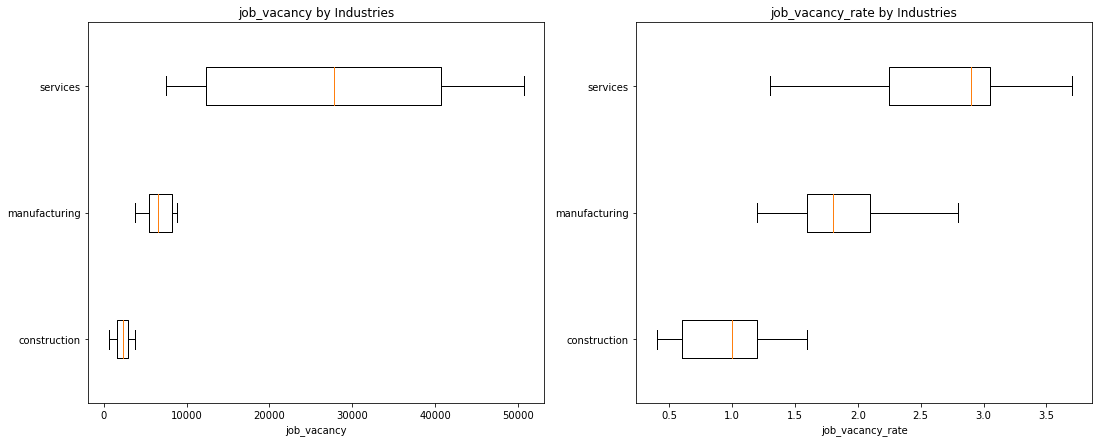

In [39]:
fig = plt.figure(figsize = (18,7))
ax1 = fig.add_subplot(1,2,1)
boxplot_industry(ax1,"job_vacancy")
ax2 = fig.add_subplot(1,2,2)
boxplot_industry(ax2,"job_vacancy_rate")

The line charts below shows that the **services industry has indeed been booming in Singapore**, specially from the period of 2005 to 2014, with vacancy volumes soaring from a monthly average of ~10K in 2005 to a monthly average of ~50K in 2014. 

Four main observations from this: 
1. The large changes in vacancies in the services industry was not a trade off from any other industry. This meant that there was indeed a booming job market in singapore during that time period. 
2. Vacancy rates remained fairly consistent, also indicating the country's ability to adapt to this changing demands by training local talents and hiring foreign talents. 
3. While vacancies in the services industry remains high, it has been dipping since 2015. This could be due to automation initiatives being adopted by companies, which could lead to lower demand for manpower. 
4. During the 2000 dot com boom, there was a large spike in job vacancy rates, especially in manufacturing and services, indicating companies were hiring more. Once the bubble had burst, we see job vacancy rates fall to levels lower than before the boom. People would have found it hard to find a new job at that time. During the 2009 financial crisis, vacancy rates also fell but quickly recovered. However, COVID19, which started to have global effect on economies in since early 2020 did not take much of a toll to the vacancy rates or volumes. 

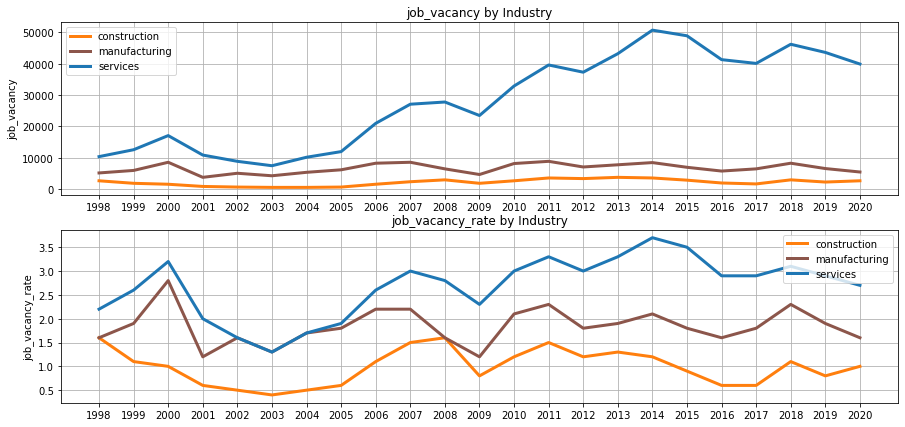

In [40]:
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(2,1,1)
linechart_industry(ax1,"job_vacancy")
ax2 = fig.add_subplot(2,1,2)
linechart_industry(ax2,"job_vacancy_rate")

In terms of occupations, vacancy volumes and rates for production operators, cleaners, and labourers are fairly consistent, indicating a relatively stable demand and supply for such jobs. Although job vacancies for professionals, managers, executives, and technicians has a wider spread, the clerical, sales, and services occupational vacancy rates have a longer tail, indicating that it times when it was harder to fill such positions. 

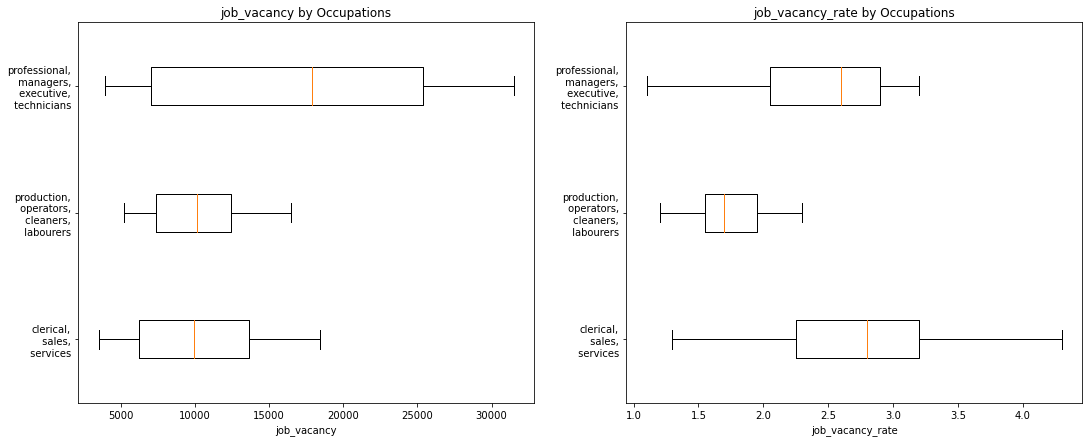

In [41]:
fig = plt.figure(figsize = (18,7))
ax1 = fig.add_subplot(1,2,1)
boxplot_occupations(ax1,"job_vacancy")
ax2 = fig.add_subplot(1,2,2)
boxplot_occupations(ax2,"job_vacancy_rate")

From the line charts below, we can see that vacancies have been rising across job scopes. While the services industry was booming, we see a rise in vacancies across job types, especially for professionals, managers, executives, and technicians. From 2015 to 2020, these positions continue to have increased vacancies while the other occupational groups dipped. This proves of the resiliance of these jobs which typically require higher levels of education than the other occupational groups. 

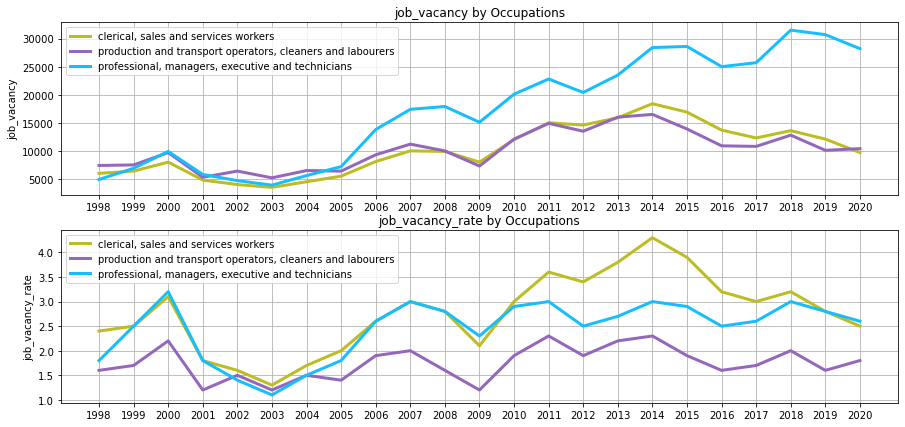

In [42]:
fig = plt.figure(figsize = (15,7))
ax1 = fig.add_subplot(2,1,1)
linechart_occupation(ax1,"job_vacancy")
ax2 = fig.add_subplot(2,1,2)
linechart_occupation(ax2,"job_vacancy_rate")

<a class="anchor" id="ECONOMIC"> <h3>Analysis of Recruitment, Resignations, and Retrenchments and its relation to the global economic climate</h3></a>

The rate of resignations and recruitment is a great way to guage the supply-demand gap for certain industries and occupational groups. 

Generally, we see that **resignation rates** across the years were fairly consistent. Most of the flactuations in the recruitment-resignation gap were caused by recruitment efforts. Nevertheless, there are 2 interesting events that caused flactuations in resignation rates. In **2000**, at the peak of the dot com boom, resignations from clerical, sales, service workers, professionals, managers, executives, and technicians had high resignation rates. This was accompanied by a spike in recruitment rates as well, indicating that the shifts in jobs were driven by market confidence. The burst of the bubble in 2001 caused the rate of resignations to fall back to previous levels. However, in **2009**, during the global financial crisis, we see a dip in resignations by the same demographic of people, especially so in the services industry. This was, however, driven by fear rather than confidence, as the recruitment rates also took a toll across industries and occupational groups. This was interesting as it shows that the rate of resignations are strongly motivated by confidence and fear of people. 

Although there were no visible changes in the vacancy volumes and rates of the **construction industry**, we can see from the line chart below that there was a steep increase in gap between 2002 and 2008. As supported by the chart on the rate of recruitment, this was driven by high recruitement rates during that period. When Singapore was hit by the **global financial crisis** in 2009,the construction industry took a major hit. It picked back up for a couple of years, but recruitement efforts were no longer as strong after 2012. The recruitment-resignation gap continued to narrow, until 2020 when it entered negative territories. In 2020, the construction industry was especially hit by **COVID19**. As most workers in the construction industry are foreigners, border restrictions made it hard for construction companies to carry on with recruitments. Furthermore, the majority of COVID19 cases in Singapore were among migrant workers working in the contruction industry - in Aug 2020, the cases within a foreign-worker domitory grew to be the largest cluster in Singapore, causing the government to impose strong restrictions on the day-to-day work of the construction industry.  

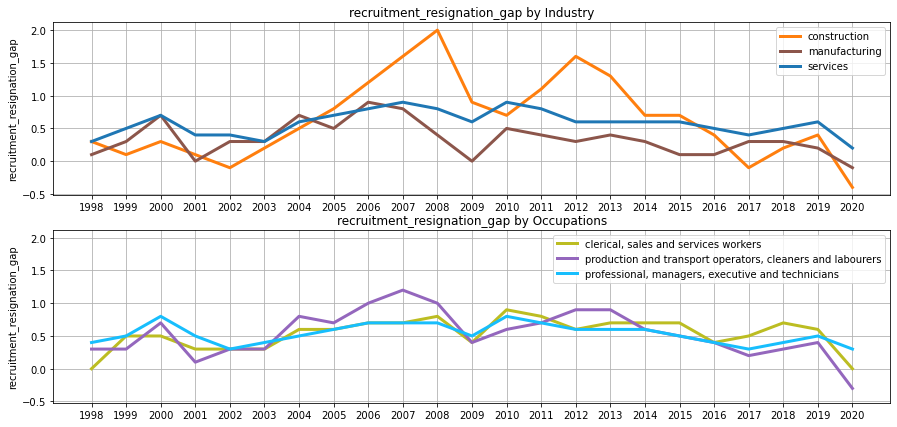

In [43]:
fig, axs = plt.subplots(2, 1, sharey=True,figsize=(15, 7))

linechart_industry(axs[0],"recruitment_resignation_gap")
linechart_occupation(axs[1],"recruitment_resignation_gap")

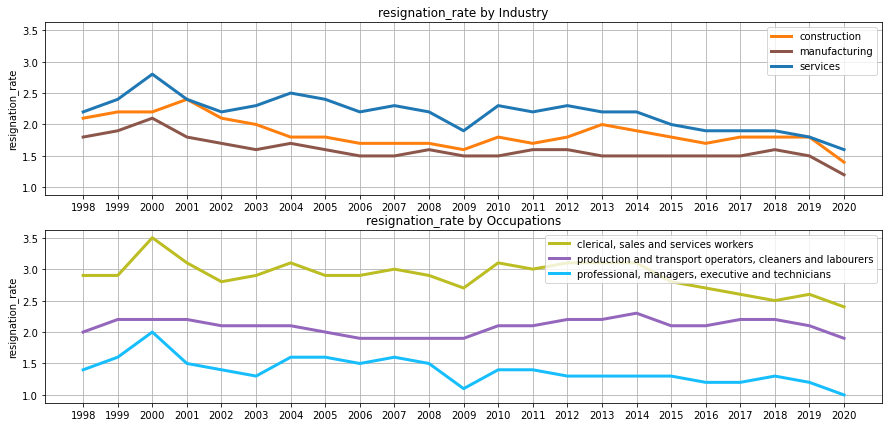

In [44]:
fig, axs = plt.subplots(2, 1, sharey=True,figsize=(15, 7))

linechart_industry(axs[0],"resignation_rate")
linechart_occupation(axs[1],"resignation_rate")

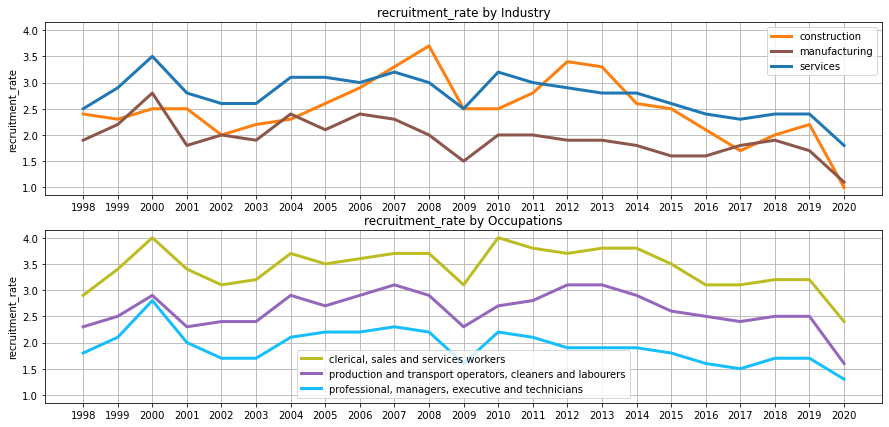

In [45]:
fig, axs = plt.subplots(2, 1, sharey=True,figsize=(15, 7))

linechart_industry(axs[0],"recruitment_rate")
linechart_occupation(axs[1],"recruitment_rate")

The **manufacturing industry** saw a peak in retrenchment volumes right after the 1997 Asian financial crisis. There was a spike in volumes again in 2009 during the global financial crisis. Nevertheless, retrenchments from the manufacturing sector is no longer as bad as it was, with volumes remaining low, even during COVID19. 

The **services industry**, however, saw a massive peak in retrenchment volumes in 2020. This is likely due to the multiple periods of lockdowns and restricted activities which caused many service-based businesses to suffer. Clerical, sales, and services workers had, for the past 30 years, the lowest retrenchment volumes. However, in 2020, retrenchment volumes from this occupational group soared to a 30-year high, surpassing volumes of the production and transport operators, cleaners, and labourers group. 

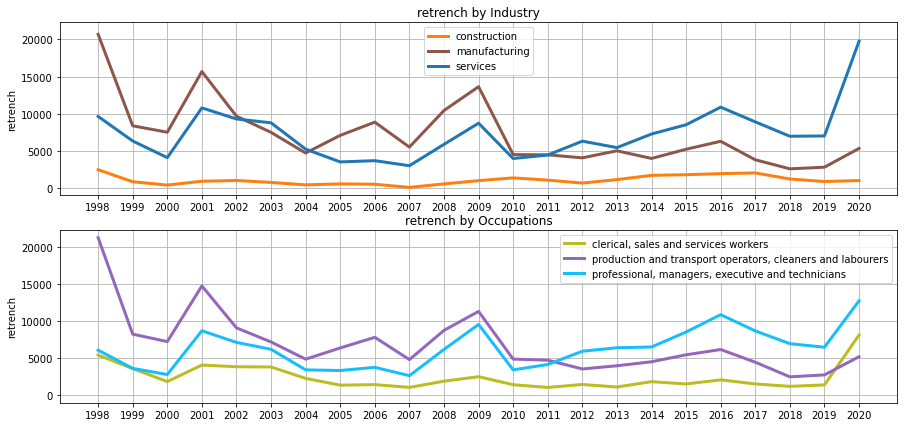

In [46]:
fig, axs = plt.subplots(2, 1, sharey=True,figsize=(15, 7))

linechart_industry(axs[0],"retrench")
linechart_occupation(axs[1],"retrench")

On a deeper look at the retrenchment data, I noticed that before 2006, at least 90% of employees who were retrenched across occupational groups were permanent employees, indicating low level of job security. Since then, however, we see a shift in retrenchment behaviour. This was especially so with the construction industry and with the productions and transport operators, cleaners, and labourers occupational group. Employers are perhaps more inclined towards contract-based engagements that allows them to have more flexibility towards changing demands. Although retrenchment volumes are not affected by this, it is a sign of better job stability for people holding permanent job positions. 

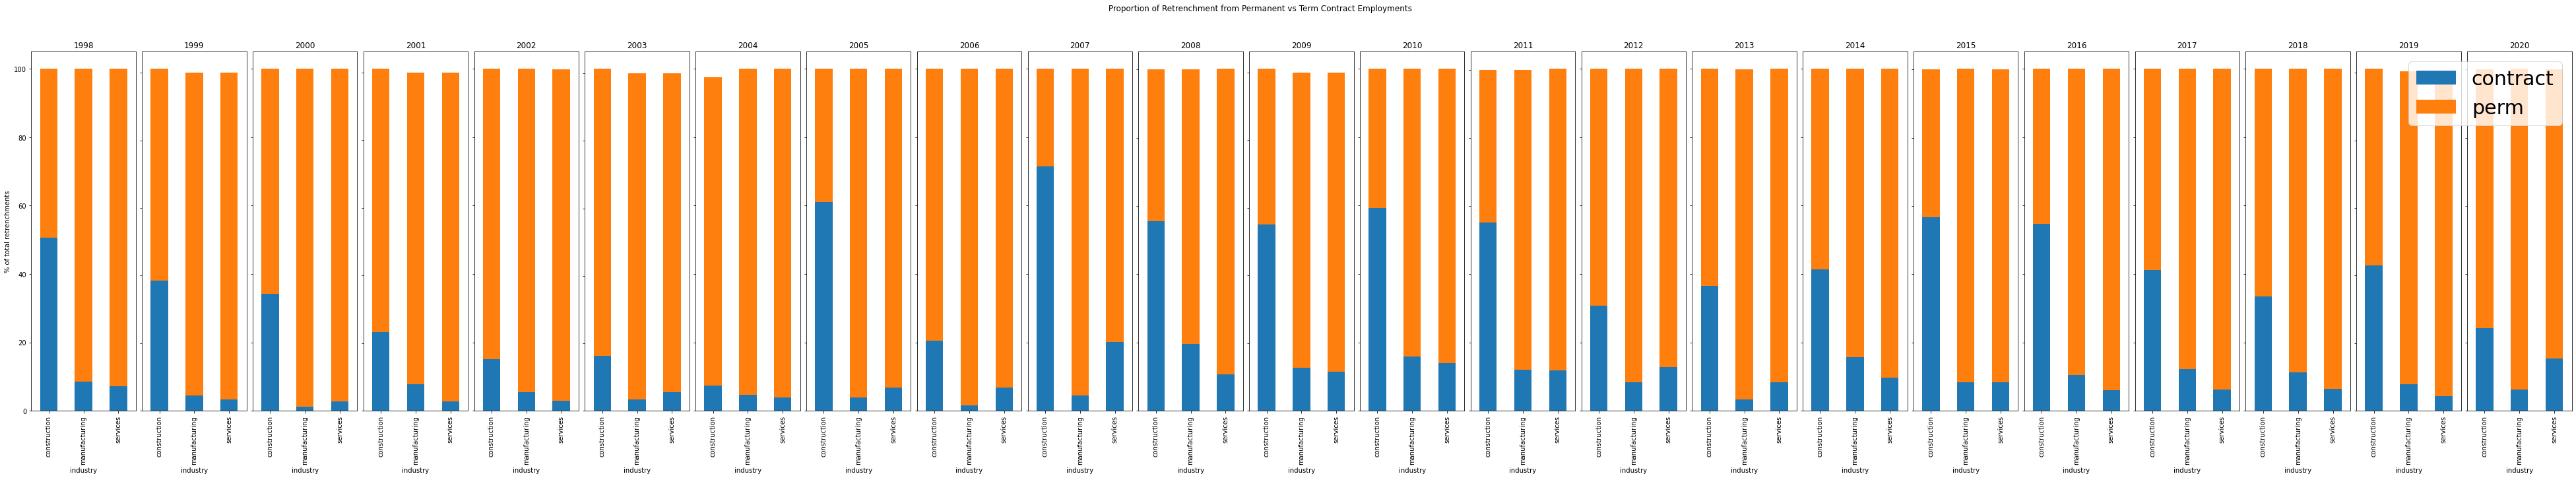

In [47]:
df_prepped=prep_data_retrenchment(industries,"industry")
yearlystackedgroupedbar(df_prepped,"industry")

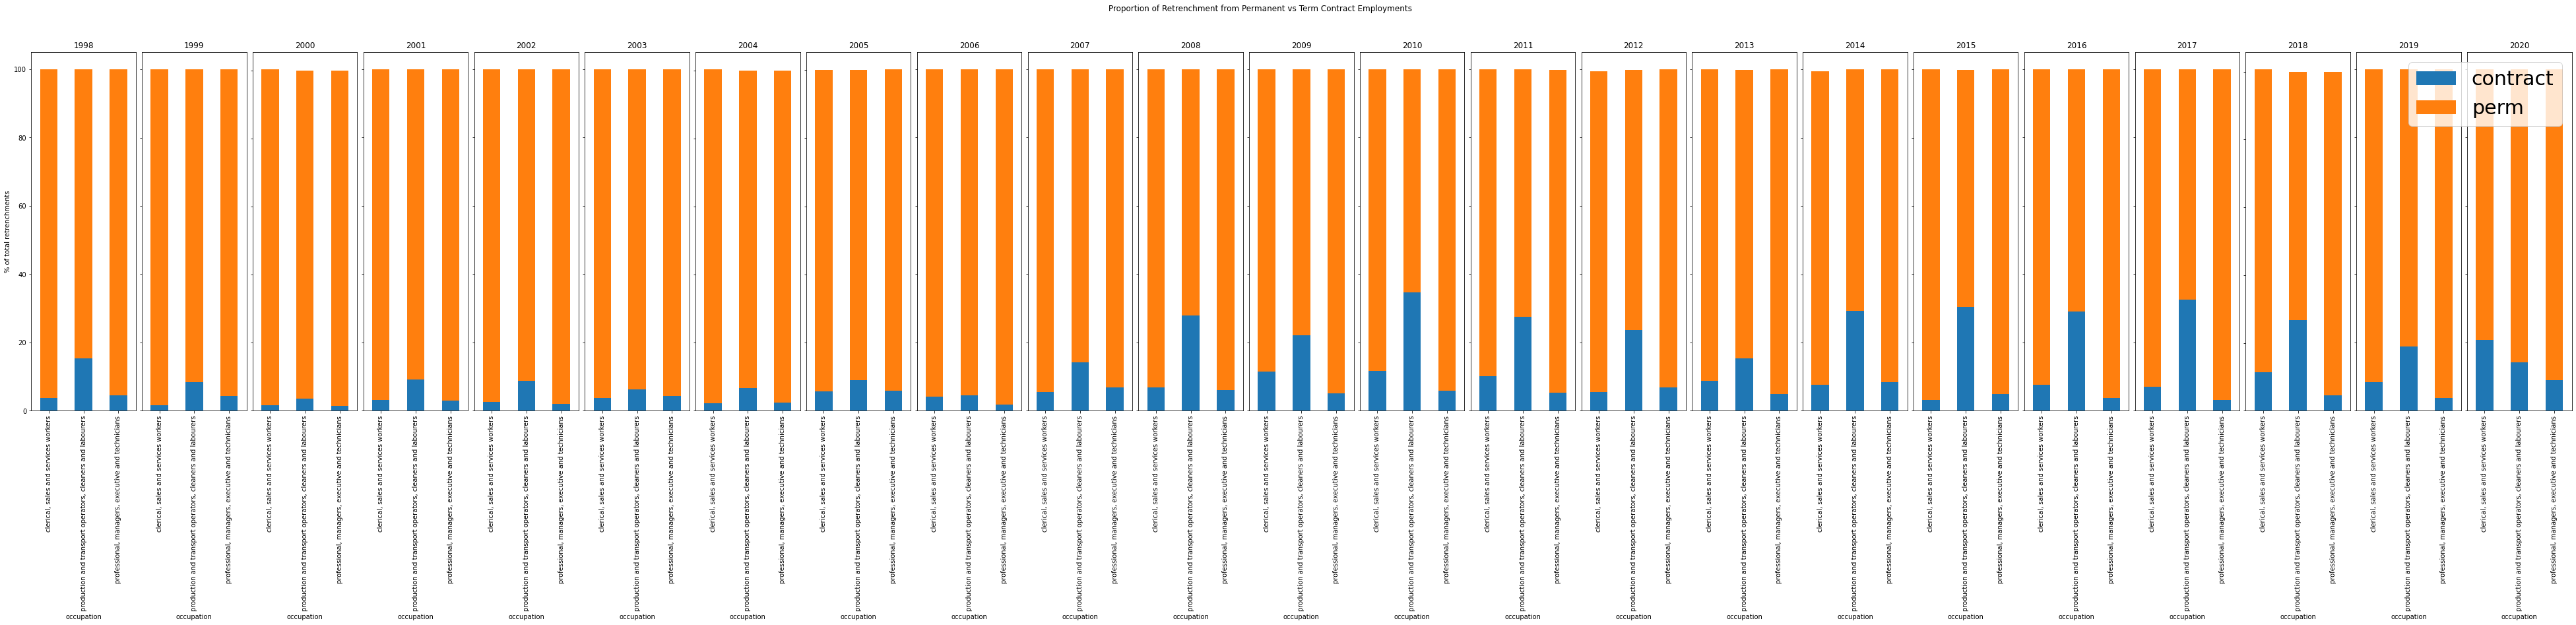

In [48]:
df_prepped=prep_data_retrenchment(occupations,"occupation")
yearlystackedgroupedbar(df_prepped,"occupation")

<a class="anchor" id="CONCLUSION"> <h2>CONCLUSION</h2></a>

In this final section, I conclude with some key highlights on the two main questions I saught to answer from this analysis:

**How has the employment landscape in Singapore changed over the past 30 years?**
* We have seen a boom in the job market in Singapore since 2005, especially in the services industry. The gap between the vacancies available in the services industry versus the other industries have been widening but has started to slow down since 2015. 
* The occupations professionals, managers, executives, and technicians was not affected by the slowdown, and continues on an upward trend even during the COVID19 pandemic. This showcases the resiliance of these job groups, which typically require higher levels of education than the other occupational groups.
* We see a shift towards greater job stability for permanent employees in the construction industry and with the productions and transport operators, cleaners, and labourers occupational group since 2016.


**How has historical global economic crisis affected the landscape of jobs in Singapore?**
* The different economic crisis had different level on impacts on the different industries and occupational groups. 
    * Employment in the manufacturing industry took the biggest hit from the 1997 Asian financial crisis, with retrenchment rates at its peak. It was also relatively affected by the 2009 financial crisis. Nevertheless, COVID19 had minimal impact retrenchment volumes in the industry.
    * Employment in the services industry took the biggest hit from COVID19, reaching its highest retrenchment volumes in 30 years.  
    * Recruitment rates among all occupational groups has historically been affected by the global economic climate, which backs up the hypothesis that Singapore's job market is heavily reliant on global economic coniditions.  
    * Finally, it was observed that resignation rates are generally stable, but can see large shifts during both market confidence and fear.   

<a class="anchor" id="REFERENCES"> <h2>REFERENCES</h2></a>

* https://www.macrotrends.net/countries/SGP/singapore/gdp-gross-domestic-product 
* https://www.macrotrends.net/countries/USA/united-states/gdp-gross-domestic-product
* https://www.investopedia.com/terms/a/annualized-rate.asp
* https://data.gov.sg/open-data-licence
* https://data.gov.sg/dataset/job-vacancy-by-industry-and-occupational-group-annual?resource_id=6d864b4e-63ae-4dac-8674-8b6685b6256b
* https://data.gov.sg/dataset/job-vacancy-rate-by-industry-and-occupational-group-annual?resource_id=54ac6f71-1839-49b9-955b-1d409180befb
* https://data.gov.sg/dataset/average-monthly-recruitment-resignation-rates-by-industry-and-occupational-group-annual?view_id=0c412db5-3b42-4453-8f25-2dfd51c52308&resource_id=736a09e9-1448-41b5-aa28-70c7d4f4ae4c
* https://data.gov.sg/dataset/retrenched-employees-by-industry-and-occupational-group-annual?resource_id=48748653-8ae6-4d7e-84f2-6525cd5e8ecc
* https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas 